In [6]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [7]:
gen = load_model('../models/generator_mnist.h5')
(X_train, _), (_, _) = mnist.load_data()
X_train = np.reshape(X_train, (-1, 28, 28, 1))/255

51336
x: (1, 28, 28, 1)
x_low: (1, 14, 14, 1)
x_gen: (1, 28, 28, 1)
x_og: (28, 28)
x_low: (14, 14)
x_gen: (28, 28)


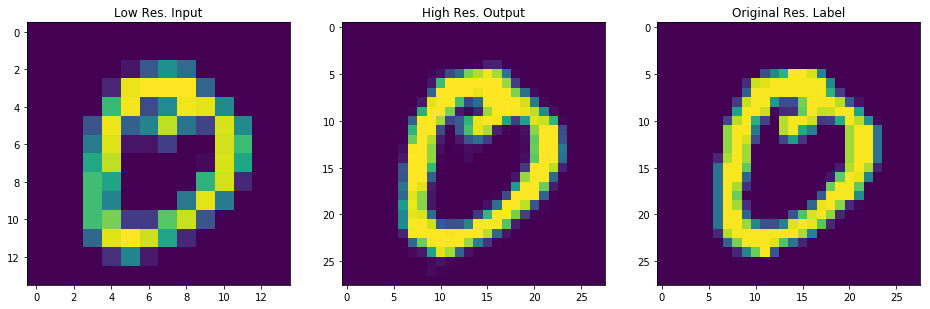

In [9]:
def plt_shape(im):
    return np.reshape(im, (im.shape[1], im.shape[2]))

def reduce_resolution(ims):
    O, M, N, P = ims.shape
    K = 2
    L = 2

    MK = M // K
    NL = N // L
    return ims.reshape(-1, MK, K, NL, L).mean(axis=(2, 4)).reshape(O, MK, NL, P)

i = np.random.randint(1,X_train.shape[0])
print(i)

x = X_train[i:i+1]
x_low = reduce_resolution(x)
x_gen = gen.predict(x_low)

print("x:", x.shape)
print("x_low:", x_low.shape)
print("x_gen:", x_gen.shape)

x_og = plt_shape(x)
x_low = plt_shape(x_low)
x_gen = plt_shape(x_gen)

print("x_og:", x_og.shape)
print("x_low:", x_low.shape)
print("x_gen:", x_gen.shape)


fig, ax = plt.subplots(1, 3)

ax[0].imshow(x_low)
ax[0].set_title("Low Res. Input")
ax[1].imshow(x_gen)
ax[1].set_title("High Res. Output")
ax[2].imshow(x_og)
ax[2].set_title("Original Res. Label")

fig.set_size_inches(16, 5)

plt.show()

In [ ]:
fig.savefig('./Low_High_Original.png', dpi=600)

25960
x: (1, 28, 28, 1)
x_1: (1, 56, 56, 1)
x_2: (1, 112, 112, 1)
x: (28, 28)
x_1: (56, 56)
x_2: (112, 112)


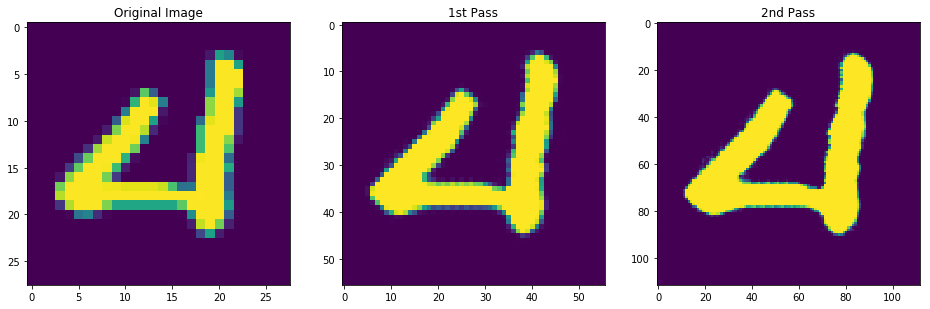

In [10]:
i = np.random.randint(1,X_train.shape[0])
print(i)

x = X_train[i:i+1]
x_1 = gen.predict(x)
x_2 = gen.predict(x_1)

print("x:", x.shape)
print("x_1:", x_1.shape)
print("x_2:", x_2.shape)

x = plt_shape(x)
x_1 = plt_shape(x_1)
x_2 = plt_shape(x_2)

print("x:", x.shape)
print("x_1:", x_1.shape)
print("x_2:", x_2.shape)


fig, ax = plt.subplots(1, 3)

ax[0].imshow(x)
ax[0].set_title("Original Image")
ax[1].imshow(x_1)
ax[1].set_title("1st Pass")
ax[2].imshow(x_2)
ax[2].set_title("2nd Pass")

fig.set_size_inches(16, 5)

plt.show()

In [ ]:
fig.savefig('./Multiple_Passes.png', dpi=600)